# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
import os
data_path = [os.getcwd()]

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath)

In [3]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
state,KS,OH,NJ,OH,OK,AL,MA,MO,LA,WV
account_length,128,107,137,84,75,118,121,147,117,141
area_code,415,415,415,408,415,510,510,415,408,415
phone_number,382-4657,371-7191,358-1921,375-9999,330-6626,391-8027,355-9993,329-9001,335-4719,330-8173
intl_plan,no,no,no,yes,yes,yes,no,yes,no,yes
voice_mail_plan,yes,yes,no,no,no,no,yes,no,no,yes
number_vmail_messages,25,26,0,0,0,0,24,0,0,37
total_day_minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6
total_day_calls,110,123,114,71,113,98,88,79,97,84
total_day_charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96


In [4]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [5]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [7]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [8]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [10]:
#Calculating Details
print('KNNClassifierModel Data Score is : ' , knn.score(X_data, y_data))

print('----------------------------------------------------')

#Calculating Prediction
y_pred = knn.predict(X_data)
y_pred_prob = knn.predict_proba(X_data)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])
 

KNNClassifierModel Data Score is :  0.9422
----------------------------------------------------
Predicted Value for KNNClassifierModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction Probabilities Value for KNNClassifierModel is :  [[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]]


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [11]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [12]:
print(accuracy(y_data, y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [13]:
#Student writes code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,weights='distance',)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [14]:
#Calculating Details
print('KNNClassifierModel Data Score is : ' , knn.score(X_data, y_data))
print('----------------------------------------------------')
#Calculating Prediction
y_pred = knn.predict(X_data)
y_pred_prob = knn.predict_proba(X_data)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

KNNClassifierModel Data Score is :  1.0
----------------------------------------------------
Predicted Value for KNNClassifierModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction Probabilities Value for KNNClassifierModel is :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
#p=1 Manhattan distance.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [16]:
#Calculating Details
print('KNNClassifierModel Data Score is : ' , knn.score(X_data, y_data))
print('----------------------------------------------------')
#Calculating Prediction
y_pred = knn.predict(X_data)
y_pred_prob = knn.predict_proba(X_data)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

KNNClassifierModel Data Score is :  0.9456
----------------------------------------------------
Predicted Value for KNNClassifierModel is :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Prediction Probabilities Value for KNNClassifierModel is :  [[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]]


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [17]:
#Student writes code here

from sklearn.neighbors import KNeighborsClassifier
grf={}

for k in range(1,20):
    

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    grf[k]=accuracy(y_data, y_pred)
print(grf)

{1: 1.0, 2: 0.9292, 3: 0.9422, 4: 0.9154, 5: 0.9284, 6: 0.9156, 7: 0.9254, 8: 0.9122, 9: 0.9224, 10: 0.9092, 11: 0.9158, 12: 0.9076, 13: 0.9148, 14: 0.905, 15: 0.9098, 16: 0.9044, 17: 0.908, 18: 0.9028, 19: 0.9078}


C:\Users\aabdu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0.5, 'Accurcy'), Text(0.5, 0, 'Number of k neighbours')]

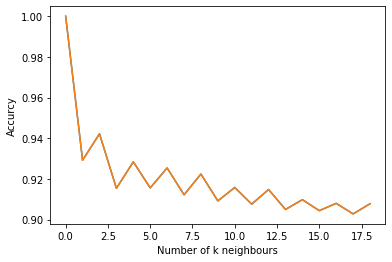

In [18]:
import matplotlib.pyplot as plt
plt.plot(list(grf.values()))
ax = plt.axes()
plt.plot(list(grf.values()))
ax.set(xlabel='Number of k neighbours',
       ylabel='Accurcy',
)

In [19]:
#p=2
from sklearn.neighbors import KNeighborsClassifier

grf={}

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn = knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    grf[k]=accuracy(y_data, y_pred)
print(grf)


{1: 1.0, 2: 0.9286, 3: 0.9456, 4: 0.9214, 5: 0.9356, 6: 0.9216, 7: 0.929, 8: 0.917, 9: 0.9256, 10: 0.9126, 11: 0.921, 12: 0.9124, 13: 0.9178, 14: 0.9096, 15: 0.9146, 16: 0.9074, 17: 0.9126, 18: 0.9054, 19: 0.9104}


C:\Users\aabdu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Accurcy'), Text(0.5, 0, 'Number of k neighbours')]

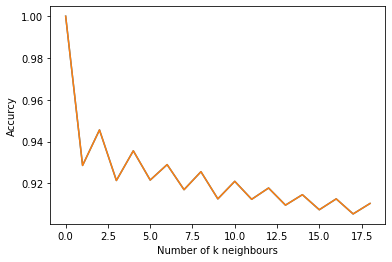

In [20]:
plt.plot(list(grf.values()))
ax = plt.axes()
plt.plot(list(grf.values()))
ax.set(xlabel='Number of k neighbours',
       ylabel='Accurcy',)